# Regression Problem: House Sales in King County, USA

King County is located in the U.S. state of Washington and is one of the most populous counties in the country. It encompasses a diverse range of landscapes, including urban areas, suburban neighborhoods, rural communities, and vast natural reserves. At its core is the city of Seattle, one of the major economic and cultural hubs of the Pacific Northwest.

The dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015. Our task is to predict the price of house given it's attibutes.

### Data column defination - 

**id** - Unique ID for each home sold<br>
**date** - Date of the home sale<br>
**price** - Price of each home sold (scale = 1e5. For eg - 1.2 means $120000)<br>
**bedrooms** - Number of bedrooms<br>
**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
**sqft_living** - Square footage of the apartments interior living space<br>
**sqft_lot** - Square footage of the land space<br>
**floors** - Number of floors<br>
**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
**view** - An index from 0 to 4 of how good the view of the property was<br>
**condition** - An index from 1 to 5 on the condition of the apartment<br>
**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design<br>
**sqft_above** - The square footage of the interior housing space that is above ground level<br>
**sqft_basement** - The square footage of the interior housing space that is below ground level<br>
**yr_built** - The year the house was initially built<br>
**yr_renovated** - The year of the house’s last renovation<br>
**zipcode** - What zipcode area the house is in<br>
**lat** - Lattitude<br>
**long** - Longitude<br>
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors<br>
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors<br>

## Load Dataset

In [3]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# load  dataset
house_df= pd.read_csv("C:\\Users\\kumarip\\Documents\\Priya\\midterm\\Problem2\\dataset\\train.csv")
#print 1st 5 rows
house_df.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2254502445  20140530T000000         3       1.00       1220.0      4800   
1   126059019  20150316T000000         4       2.50       3170.0     94855   
2  8825900020  20140811T000000         5       3.00       2710.0      4200   
3  9465910380  20141024T000000         4       2.25       2850.0      7453   
4  7784400060  20150120T000000         3       2.50       2370.0      9000   

   floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0     1.0           0   0.0          3  ...        1220              0   
1     1.0           0   0.0          4  ...        1910           1260   
2     2.0           0   0.0          3  ...        1890            820   
3     2.0           0   NaN          3  ...        2850              0   
4     1.0           0   3.0          4  ...        1570            800   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1901             0    98122  47.6101 -122.307           1200   
1      1978             0    98072  47.7648 -122.112           2590   
2      1919          2014    98115  47.6754 -122.307           2150   
3      1991             0    98072  47.7439 -122.174           2700   
4      1952             0    98146  47.4922 -122.365           2120   

   sqft_lot15  price  
0        4800   3.85  
1       65340   7.99  
2        4200   9.25  
3        8468   5.40  
4        9500   5.45  

[5 rows x 21 columns]

# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1: Data Analysis (10 points)

Explore the data to find any relationship between the target variable and the input variables. 

Start with providing some descriptive statistics of the data with visualizations. 

Are there any missing values? Are there any outliers? What is the relationship between the input variables and the target variable. Show some statistical plots to get some insights about the relationship between data attributes and the data attibutes with the label. 

In [5]:
print(house_df.shape)

(19451, 21)


> There are 19451 rows and 21 columns in train dataset

In [6]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19451 non-null  int64  
 1   date           18693 non-null  object 
 2   bedrooms       19451 non-null  int64  
 3   bathrooms      19451 non-null  float64
 4   sqft_living    18857 non-null  float64
 5   sqft_lot       19451 non-null  int64  
 6   floors         19451 non-null  float64
 7   waterfront     19451 non-null  int64  
 8   view           18478 non-null  float64
 9   condition      19451 non-null  int64  
 10  grade          18078 non-null  float64
 11  sqft_above     19451 non-null  int64  
 12  sqft_basement  19451 non-null  int64  
 13  yr_built       19451 non-null  int64  
 14  yr_renovated   19451 non-null  int64  
 15  zipcode        19451 non-null  int64  
 16  lat            19451 non-null  float64
 17  long           19451 non-null  float64
 18  sqft_l

>It's important to note that the distinction between categorical and continuous features can  be subjective and context-dependent.It looks like date,  waterfront, condition and  zipcode is categorical.The features "bedrooms" and "bathrooms" are typically considered as discrete numerical variables rather than categorical or continuous.

In [7]:
# converting datatypes
house_df['waterfront']=house_df['waterfront'].astype('object')
house_df['condition']=house_df['condition'].astype('object')
house_df['zipcode']=house_df['zipcode'].astype('object')

In [8]:
#Get the categorial and continous features

continuous_feature=[]
categorical_features=[]

for col in house_df.columns:
    if house_df[col].dtype=="object":
        categorical_features.append(col)
    else:
        continuous_feature.append(col)

print('categorical_features :' ,categorical_features)
print('\ncontinuous_feature:' ,continuous_feature)

categorical_features : ['date', 'waterfront', 'condition', 'zipcode']

continuous_feature: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']


In [9]:
#check for null values
house_df.isnull().sum()

id                  0
date              758
bedrooms            0
bathrooms           0
sqft_living       594
sqft_lot            0
floors              0
waterfront          0
view              973
condition           0
grade            1373
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

> There are missing values for date, sqft_living, view and grade variables which will be fixed later in Q2

In [10]:
## Analysing date column

house_df['date']=pd.to_datetime(house_df['date']) #converting into date type
#splittng into year and months to check if sale month or year has any impact on house price
house_df['sale_year']=house_df['date'].dt.year
house_df['sale_month']=house_df['date'].dt.month


In [11]:
house_df.groupby('sale_year')['price'].mean()

sale_year
2014.0    5.406518
2015.0    5.408863
Name: price, dtype: float64

In [12]:
house_df.groupby('sale_month')['price'].mean()


sale_month
1.0     5.218033
2.0     5.108370
3.0     5.395559
4.0     5.636119
5.0     5.470446
6.0     5.607856
7.0     5.473508
8.0     5.406163
9.0     5.276619
10.0    5.407446
11.0    5.233042
12.0    5.277350
Name: price, dtype: float64

> The above observations suggest that the sale_month and sale_year features have minimal impact on the house price. Hence, it's recommended to drop these columns from the dataset.

In [14]:
## Dropping date, sale_year and sale_month columns
house_df=house_df.drop(columns=['date','sale_year','sale_month'])
house_df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [15]:
#  statistical values 
description=house_df.describe().T
pd.options.display.float_format = '{:.10f}'.format #Setting the display format for float values
description

count                  mean                   std  \
id            19451.0000000000 4579304934.0546503067 2876636673.0717010498   
bedrooms      19451.0000000000          3.3748907511          0.9318775211   
bathrooms     19451.0000000000          2.1171148013          0.7706026248   
sqft_living   18857.0000000000       2083.8228244153        921.6559393894   
sqft_lot      19451.0000000000      15262.3274381780      42467.4588182065   
floors        19451.0000000000          1.4966068583          0.5400550316   
view          18478.0000000000          0.2337915359          0.7641087157   
grade         18078.0000000000          7.6567098130          1.1748112644   
sqft_above    19451.0000000000       1791.7850496118        831.2958856978   
sqft_basement 19451.0000000000        291.8711120251        442.5401000451   
yr_built      19451.0000000000       1971.0672973112         29.3556026874   
yr_renovated  19451.0000000000         85.5694822888        404.3112117297   
lat           19451.0000000000         47.5597956969          0.1386880899   
long          19451.0000000000       -122.2144106730          0.1405087919   
sqft_living15 19451.0000000000       1987.5747262352        686.2250190483   
sqft_lot15    19451.0000000000      12847.1655441880      27492.5403467726   
price         19451.0000000000          5.4040263570          3.6865568786   

                             min                   25%                   50%  \
id            1000102.0000000000 2124084060.5000000000 3904920600.0000000000   
bedrooms            0.0000000000          3.0000000000          3.0000000000   
bathrooms           0.0000000000          1.7500000000          2.2500000000   
sqft_living       290.0000000000       1430.0000000000       1920.0000000000   
sqft_lot          520.0000000000       5043.0000000000       7620.0000000000   
floors              1.0000000000          1.0000000000          1.5000000000   
view                0.0000000000          0.0000000000          0.0000000000   
grade               1.0000000000          7.0000000000          7.0000000000   
sqft_above        290.0000000000       1200.0000000000       1560.0000000000   
sqft_basement       0.0000000000          0.0000000000          0.0000000000   
yr_built         1900.0000000000       1952.0000000000       1975.0000000000   
yr_renovated        0.0000000000          0.0000000000          0.0000000000   
lat                47.1593000000         47.4695000000         47.5719000000   
long             -122.5190000000       -122.3290000000       -122.2310000000   
sqft_living15     399.0000000000       1490.0000000000       1840.0000000000   
sqft_lot15        651.0000000000       5100.0000000000       7620.0000000000   
price               0.7500000000          3.2100000000          4.5000000000   

                                75%                   max  
id            7304800695.0000000000 9900000190.0000000000  
bedrooms               4.0000000000         33.0000000000  
bathrooms              2.5000000000          8.0000000000  
sqft_living         2550.0000000000      13540.0000000000  
sqft_lot           10718.0000000000    1651359.0000000000  
floors                 2.0000000000          3.5000000000  
view                   0.0000000000          4.0000000000  
grade                  8.0000000000         13.0000000000  
sqft_above          2220.0000000000       9410.0000000000  
sqft_basement        560.0000000000       4820.0000000000  
yr_built            1997.0000000000       2015.0000000000  
yr_renovated           0.0000000000       2015.0000000000  
lat                   47.6777000000         47.7776000000  
long                -122.1260000000       -121.3150000000  
sqft_living15       2360.0000000000       6210.0000000000  
sqft_lot15         10087.0000000000     871200.0000000000  
price                  6.4500000000         77.0000000000

> Below are some conclusions from the statistical analysis:</br>
>>Price: The price of houses ranges from 0.75 to 77.</br>
>>Floors: Most houses have around 1.5 floors on average.</br>
>>Bedrooms and Bathrooms: The average number of bedrooms is around 3.37, with an average of 2.12 bathrooms per house.</br>
>>Year Built: Houses were built between 1900 and 2015, with an average year of construction around 1971.</br>

In [16]:
# calculating correlation with price
house_df.corr()['price'].sort_values()

zipcode         -0.0515962070
id              -0.0140905784
long             0.0242951016
condition        0.0369180339
yr_built         0.0555002095
sqft_lot15       0.0861146711
sqft_lot         0.0904766531
yr_renovated     0.1233881661
floors           0.2568822642
waterfront       0.2644727819
bedrooms         0.3069349749
lat              0.3071451294
sqft_basement    0.3268842251
view             0.3955513429
bathrooms        0.5242618380
sqft_living15    0.5846440584
sqft_above       0.6059338198
grade            0.6656806346
sqft_living      0.7017039680
price            1.0000000000
Name: price, dtype: float64

> 'sqft_living' is the variable with the maximum correlation with 'price,' suggesting that as living area increases, the price of the house tends to increase as well. This relation is very intuitive as we observe in real scenarios. Similarly, 'sqft_above' and 'grade' also have strong positive correlations with price. <br>
> Zipcode has a small negative correlation (-0.05) with price, suggesting that there might be a slight decrease in price associated with certain zip codes. 

In [17]:
house_df['yr_renovated'].value_counts()

yr_renovated
0       18617
2014       86
2013       36
2005       34
2000       33
        ...  
1959        1
1954        1
1934        1
1944        1
1948        1
Name: count, Length: 69, dtype: int64

> We can replace the values in the "year renovated" column with binary indicators: 0 for not renovated and 1 for renovated later in q2


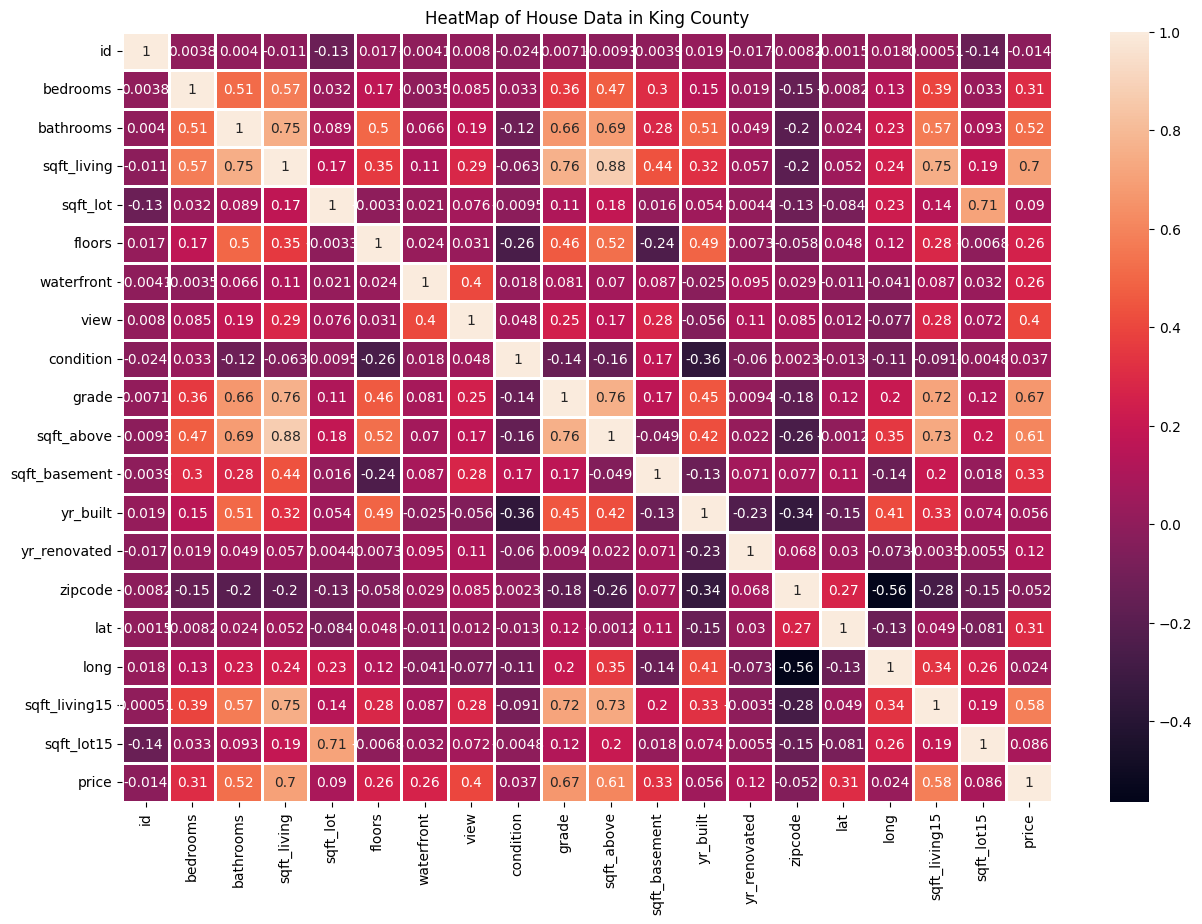

In [18]:
#heatmap to show correlation between different variables
plt.figure(figsize=(15,10))
heat_map = sns.heatmap(house_df.corr(), linewidth = 1 , annot = True)
plt.title( "HeatMap of House Data in King County" )
plt.show()

> This heatmap presents the visual represenatation of how different features are related to each other and to the target variable (price).<br>
>For eg:</br>
>'bedrooms' and 'bathrooms' are related to each other(0.51). We could combine these as total rooms later to see the impact</br>
>sqft_living is related to bathrooms (0.75). </br>
> sqrt_above is related to  grade (0.76) etc.

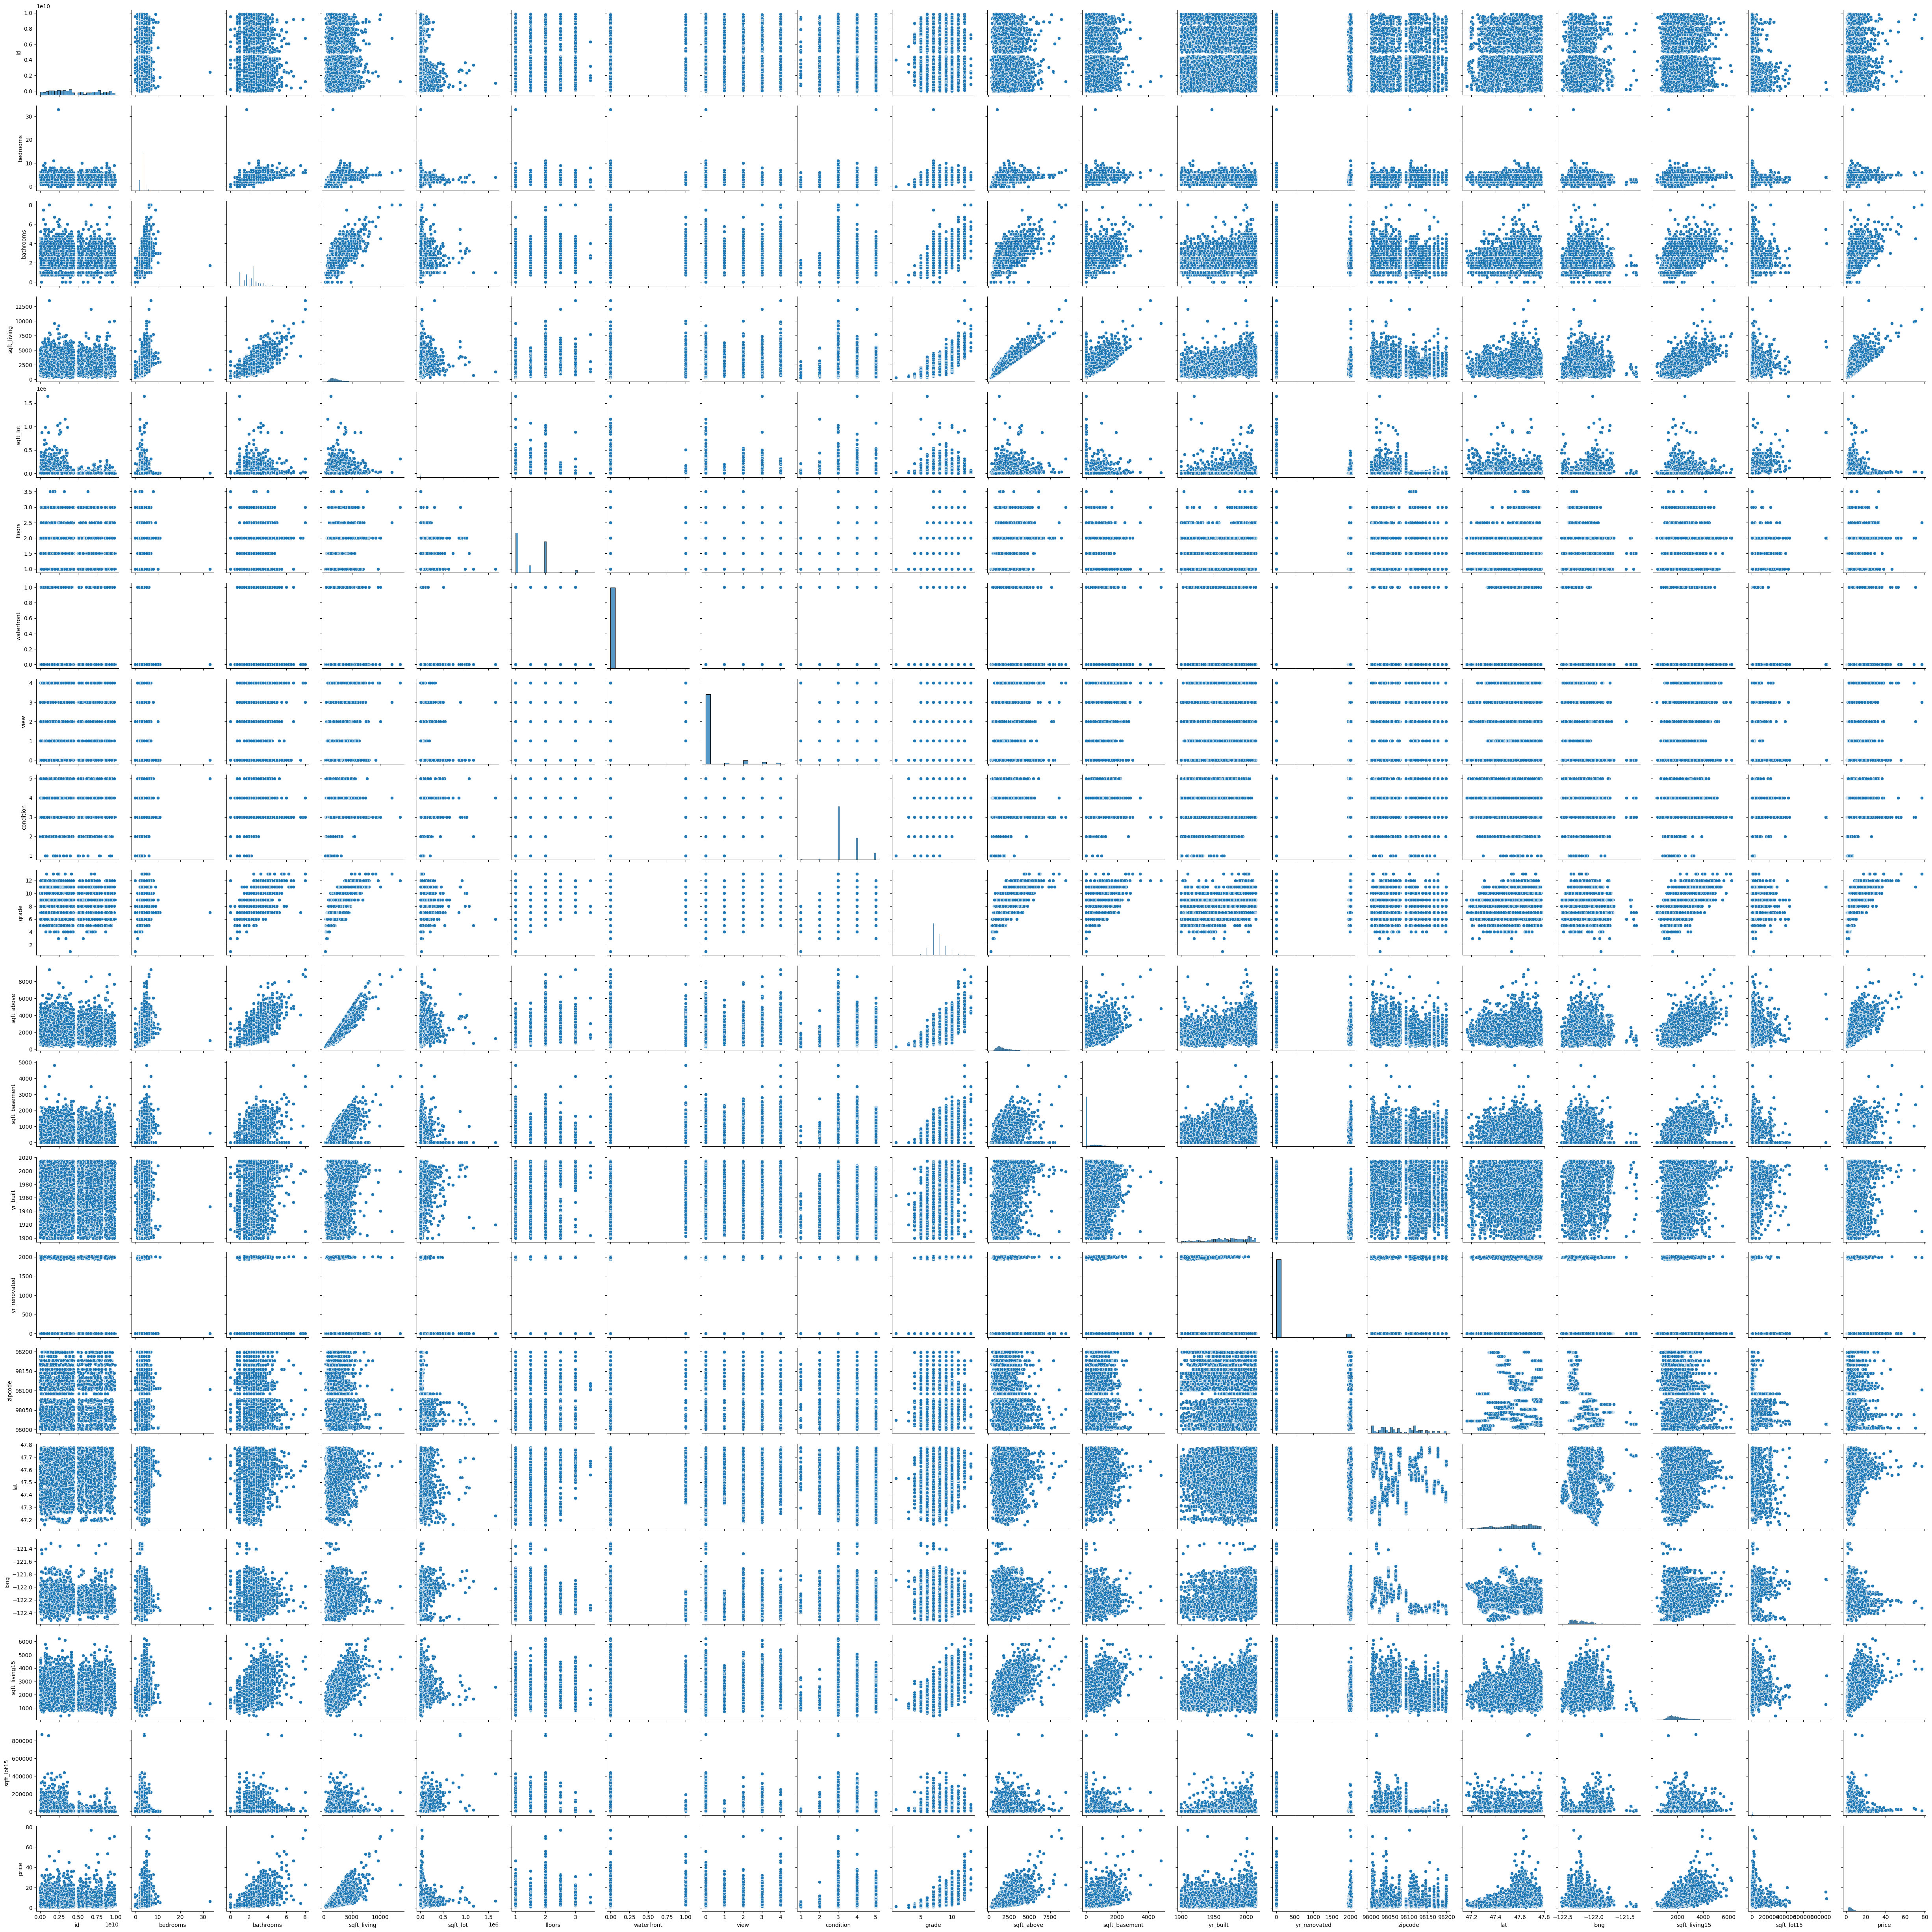

In [19]:
#pairplot
sns.pairplot(house_df)
plt.show()

>  In the plotted dataset, each variable is plotted against every other variable, with the distribution of each variable shown along the diagonal. Examples of observed relationships include a linear relation between "sqft_living" and "price", as well as between "sqft_above" and "price".

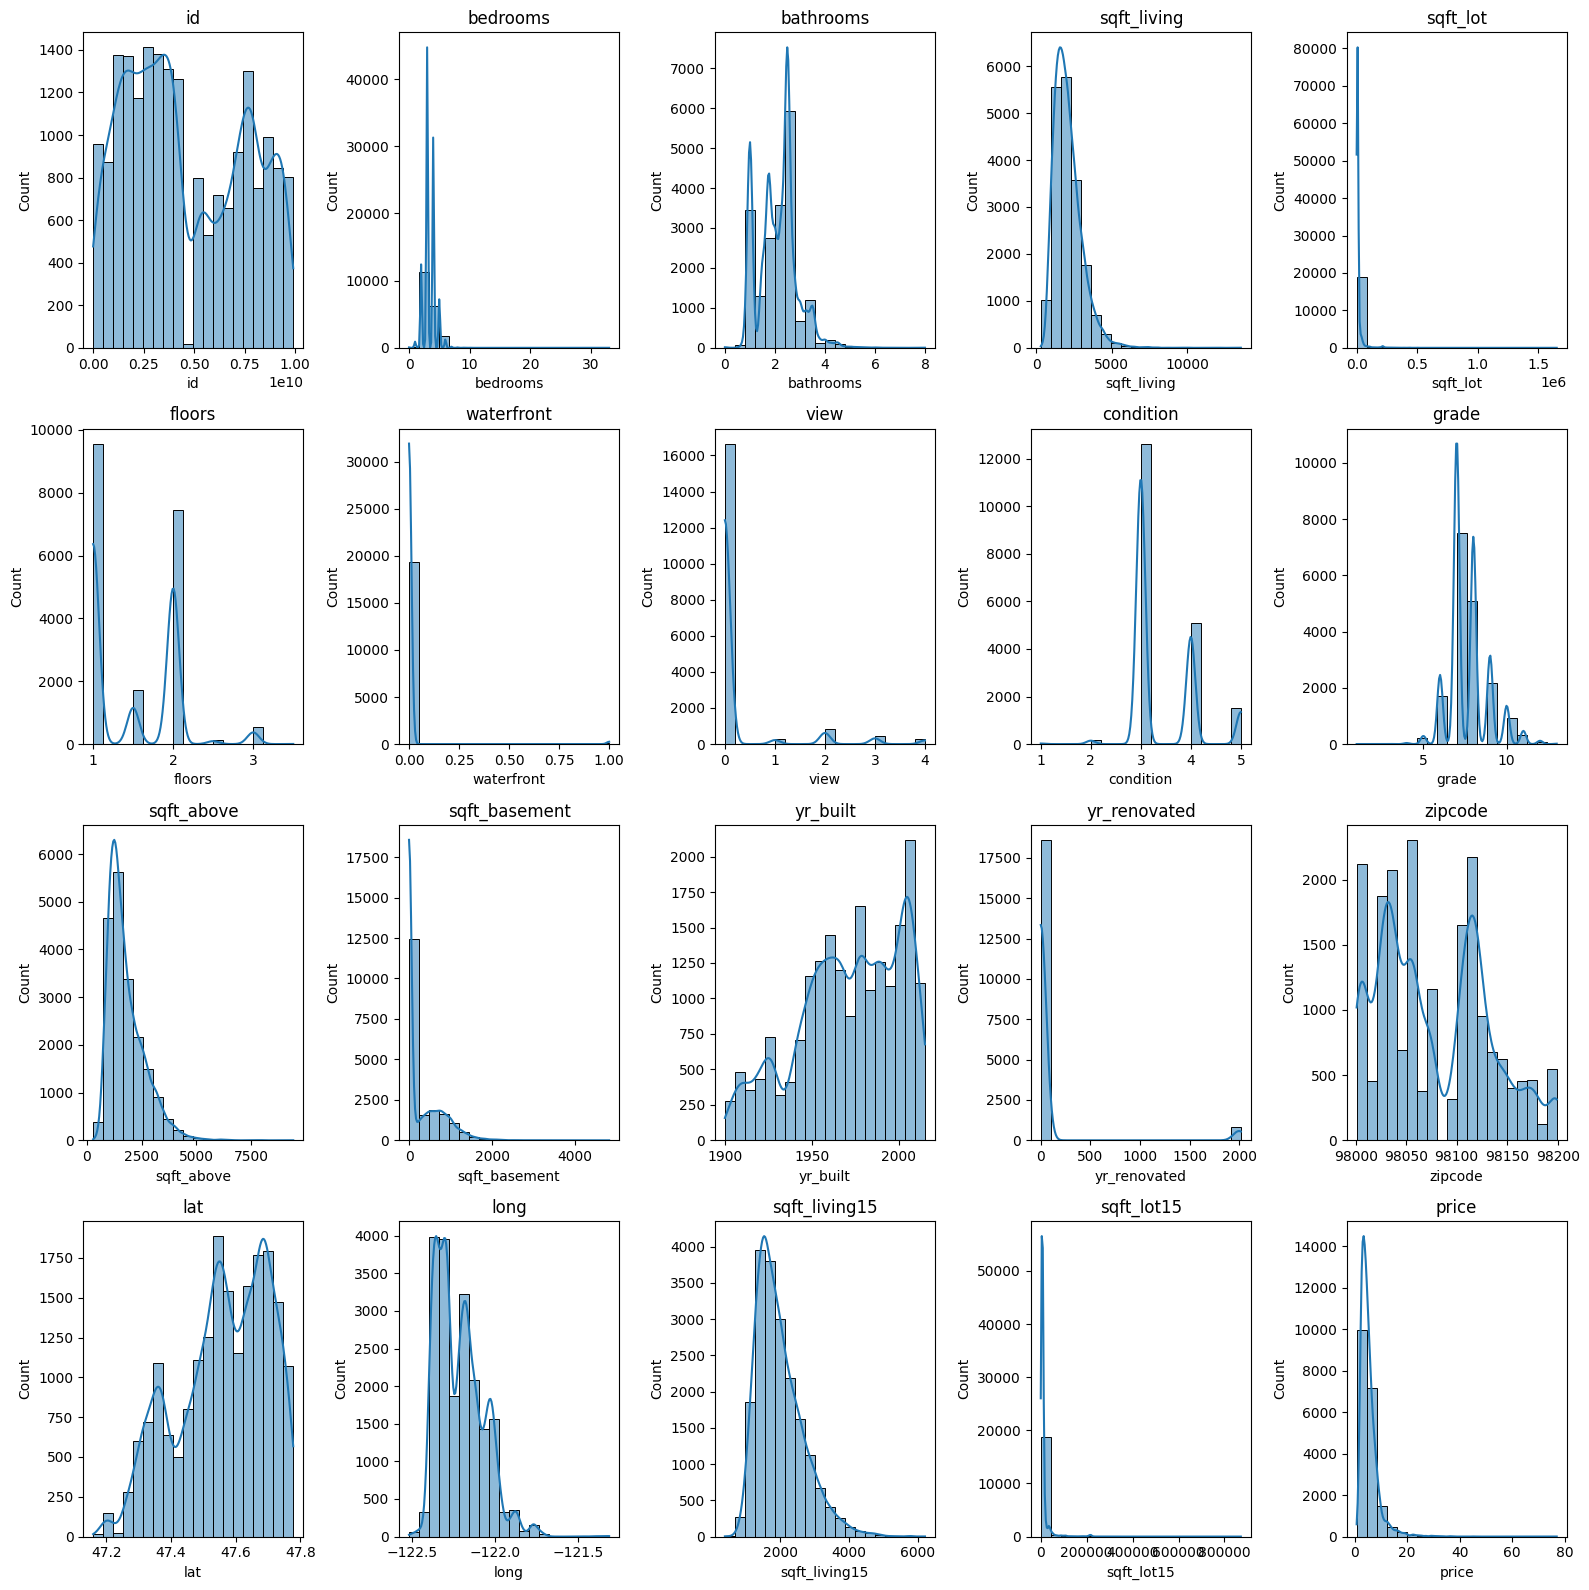

In [20]:
#Plotting histograms

plt.figure(figsize=(16, 16))
for feature in house_df.columns.to_list():
    plt.subplot(4, 5, house_df.columns.to_list().index(feature) + 1)
    sns.histplot(data=house_df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

> For the variables sqft_lot, sqft_lot15, waterfront, and view, a significant portion of the values are 0.</br>
>>Approach 1:We can try dropping these variables from the analysis due to their limited variability.</br>
>>Approach 2: Alternatively, we can transform these variables or create new features. For example, we can create binary indicators to denote whether a property has a waterfront view or not.

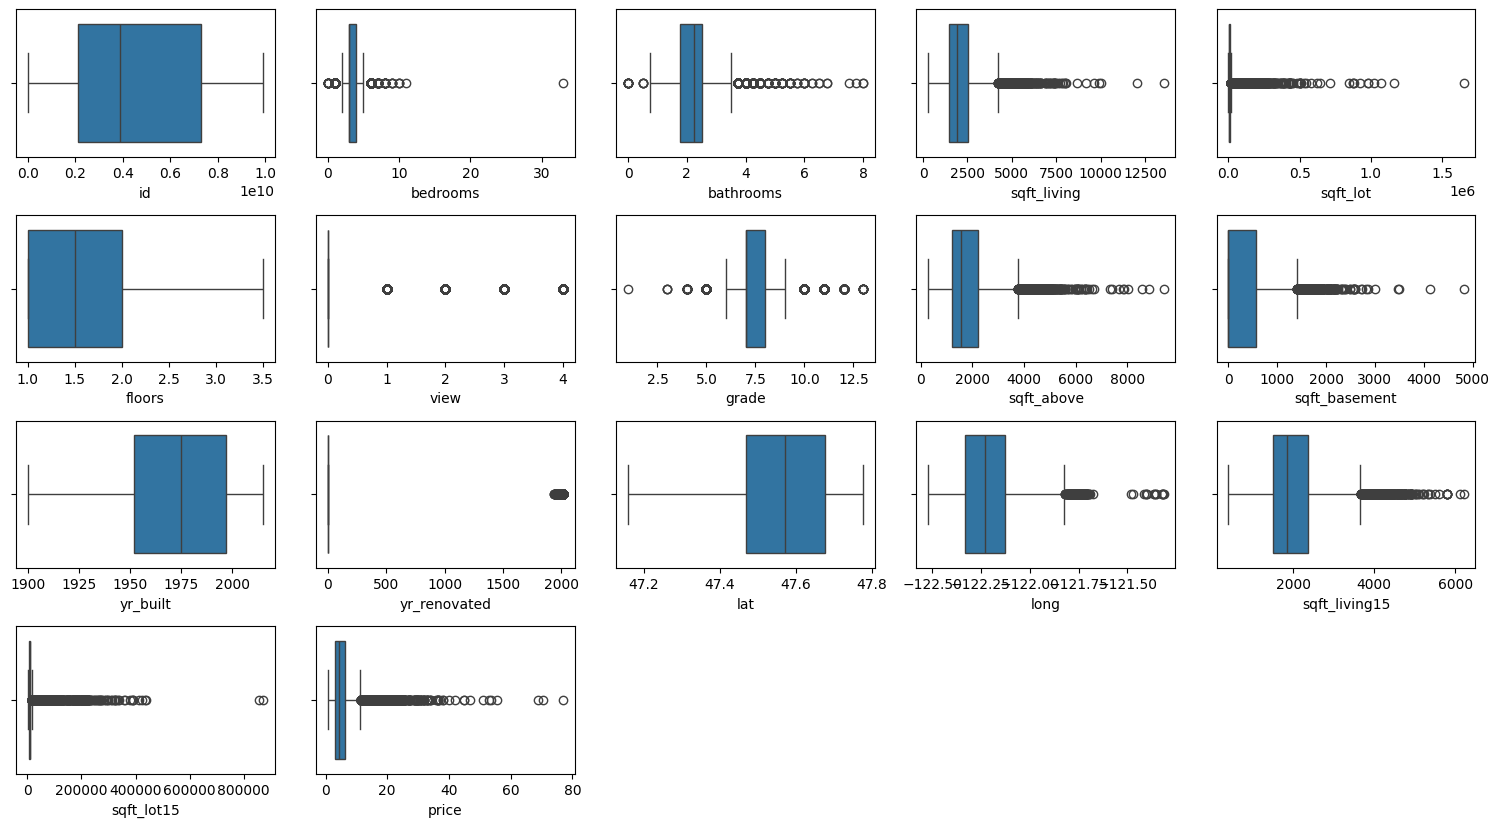

In [21]:
# Creating  box plots 
plt.figure(figsize=(15,10))
for i, col in enumerate(continuous_feature):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x=house_df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

>Outliers are present in several columns. As of now, they appear to be important. For instance, some high prices observed could be attributed to a higher number of bedrooms, which may not necessarily be considered outliers. However, if necessary, we can consider applying log transformation to address any issues related to outliers.



## Question 2: Data pre-processing & Feature Engineering (20 points)

After getting some insights about the relationships through the EDA process, now move on to clean and preprocess the data. 

How are you going to deal with the missing values? How are you going to deal with the numerical and categorical columns? Are all the attributes relevant? Does any feature need to be reengineered?

#### Null Value Treatment

In [22]:
house_df.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living       594
sqft_lot            0
floors              0
waterfront          0
view              973
condition           0
grade            1373
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

>Given the strong correlation between sqft_living and grade with the house price, I have opted not to remove the rows containing missing values in these columns. Instead, I will perform simple imputation by replacing the missing values with the median value. I chose median imputation over mean imputation due to the presence of outliers, as mean imputation can be sensitive to outliers, potentially distorting the imputed values

In [23]:
columns_with_missing = ['grade', 'sqft_living', 'view']
imputer = SimpleImputer(strategy='median')
# Fit the imputer to the non-null values of the specified columns
imputer.fit(house_df[columns_with_missing])
# Transform the specified columns, replacing missing values with the median
house_df[columns_with_missing] = imputer.transform(house_df[columns_with_missing])

In [24]:
#check the results
house_df.isnull().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

#### Dropping irrelevant columns

In [25]:
house_df_sel=house_df.copy()  #creating a copy 

In the Data Analysis section, the 'date' column has already been dropped. Now, I will proceed to drop the 'id' column as it is unique and irrelevant.

In [26]:
house_df_sel=house_df_sel.drop(columns='id')

In the previous analysis, it was noted that a significant proportion of values in the columns 'sqft_lot', 'sqft_lot15', 'waterfront', and 'view' are zero. Initially, I attempted to improve model performance by dropping these columns and reevaluating the Mean Squared Error (MSE) score. Surprisingly, upon dropping these columns, the MSE score increased. Consequently, I have decided to retain these columns for modeling purposes

#### Feature Engineering

In [27]:
#Calculating the age of the building based on the 'yr_built' column.
current_year = datetime.now().year
house_df_sel['years']=current_year-house_df_sel['yr_built']
house_df_sel.head()

bedrooms    bathrooms     sqft_living  sqft_lot       floors waterfront  \
0         3 1.0000000000 1220.0000000000      4800 1.0000000000          0   
1         4 2.5000000000 3170.0000000000     94855 1.0000000000          0   
2         5 3.0000000000 2710.0000000000      4200 2.0000000000          0   
3         4 2.2500000000 2850.0000000000      7453 2.0000000000          0   
4         3 2.5000000000 2370.0000000000      9000 1.0000000000          0   

          view condition        grade  sqft_above  sqft_basement  yr_built  \
0 0.0000000000         3 6.0000000000        1220              0      1901   
1 0.0000000000         4 9.0000000000        1910           1260      1978   
2 0.0000000000         3 7.0000000000        1890            820      1919   
3 0.0000000000         3 9.0000000000        2850              0      1991   
4 3.0000000000         4 8.0000000000        1570            800      1952   

   yr_renovated zipcode           lat            long  sqft_living15  \
0             0   98122 47.6101000000 -122.3070000000           1200   
1             0   98072 47.7648000000 -122.1120000000           2590   
2          2014   98115 47.6754000000 -122.3070000000           2150   
3             0   98072 47.7439000000 -122.1740000000           2700   
4             0   98146 47.4922000000 -122.3650000000           2120   

   sqft_lot15        price  years  
0        4800 3.8500000000    123  
1       65340 7.9900000000     46  
2        4200 9.2500000000    105  
3        8468 5.4000000000     33  
4        9500 5.4500000000     72

In [28]:
#deleting the old 'yr_built' column
house_df_sel=house_df_sel.drop(columns=['yr_built'],axis=1)

In [29]:
#updating renovated column with 0 and 1
house_df_sel['yr_renovated']= house_df_sel['yr_renovated'].apply(lambda x:1 if x!=0 else 0)

In [30]:
house_df_sel['yr_renovated'].value_counts()

yr_renovated
0    18617
1      834
Name: count, dtype: int64

In [31]:
house_df_sel.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'years'],
      dtype='object')

In [32]:
house_df_sel.head()

bedrooms    bathrooms     sqft_living  sqft_lot       floors waterfront  \
0         3 1.0000000000 1220.0000000000      4800 1.0000000000          0   
1         4 2.5000000000 3170.0000000000     94855 1.0000000000          0   
2         5 3.0000000000 2710.0000000000      4200 2.0000000000          0   
3         4 2.2500000000 2850.0000000000      7453 2.0000000000          0   
4         3 2.5000000000 2370.0000000000      9000 1.0000000000          0   

          view condition        grade  sqft_above  sqft_basement  \
0 0.0000000000         3 6.0000000000        1220              0   
1 0.0000000000         4 9.0000000000        1910           1260   
2 0.0000000000         3 7.0000000000        1890            820   
3 0.0000000000         3 9.0000000000        2850              0   
4 3.0000000000         4 8.0000000000        1570            800   

   yr_renovated zipcode           lat            long  sqft_living15  \
0             0   98122 47.6101000000 -122.3070000000           1200   
1             0   98072 47.7648000000 -122.1120000000           2590   
2             1   98115 47.6754000000 -122.3070000000           2150   
3             0   98072 47.7439000000 -122.1740000000           2700   
4             0   98146 47.4922000000 -122.3650000000           2120   

   sqft_lot15        price  years  
0        4800 3.8500000000    123  
1       65340 7.9900000000     46  
2        4200 9.2500000000    105  
3        8468 5.4000000000     33  
4        9500 5.4500000000     72

#### Handling Outliers

In [33]:
#handling outliers using log transformation
house_df_sel['sqft_living'] = np.log(house_df_sel['sqft_living'])
house_df_sel['sqft_lot'] = np.log(house_df_sel['sqft_lot'])
house_df_sel['sqft_lot15'] = np.log(house_df_sel['sqft_lot15'] )
house_df_sel.head()

bedrooms    bathrooms  sqft_living      sqft_lot       floors waterfront  \
0         3 1.0000000000 7.1066061377  8.4763711969 1.0000000000          0   
1         4 2.5000000000 8.0614868669 11.4601046888 1.0000000000          0   
2         5 3.0000000000 7.9047039139  8.3428398043 2.0000000000          0   
3         4 2.2500000000 7.9550742733  8.9163719149 2.0000000000          0   
4         3 2.5000000000 7.7706452341  9.1049798563 1.0000000000          0   

          view condition        grade  sqft_above  sqft_basement  \
0 0.0000000000         3 6.0000000000        1220              0   
1 0.0000000000         4 9.0000000000        1910           1260   
2 0.0000000000         3 7.0000000000        1890            820   
3 0.0000000000         3 9.0000000000        2850              0   
4 3.0000000000         4 8.0000000000        1570            800   

   yr_renovated zipcode           lat            long  sqft_living15  \
0             0   98122 47.6101000000 -122.3070000000           1200   
1             0   98072 47.7648000000 -122.1120000000           2590   
2             1   98115 47.6754000000 -122.3070000000           2150   
3             0   98072 47.7439000000 -122.1740000000           2700   
4             0   98146 47.4922000000 -122.3650000000           2120   

     sqft_lot15        price  years  
0  8.4763711969 3.8500000000    123  
1 11.0873596852 7.9900000000     46  
2  8.3428398043 9.2500000000    105  
3  9.0440496323 5.4000000000     33  
4  9.1590470776 5.4500000000     72

#### Define X and y

In [34]:
X=house_df_sel.drop(columns='price').values
y=house_df_sel['price'].values

#### Split the dataset

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Scaling

In [36]:
scaler = StandardScaler()
X_train_sc=scaler.fit_transform(X_train)

# transform testing datasaet
X_test_sc= scaler.transform(X_test)

 >Training and Testing datasets are scaled , which is essential for maintaining consistency and ensuring that the model's performance is not biased by differences in the scale of the features.

## Question 3 - Modeling (20 points)

Now, it's time to do some modeling. Show the modeling techniques you have used to predict the price of the house sold given the data attributes. Some of the necessary things you need to remember are - <br>

1) Use RMSE as the evaluation metric.<br>
2) Report the 5CV validation score for each model you create.<br>

#### Random Forest

In [38]:
#initialize a Random Forest Regression model 
rf = RandomForestRegressor(n_estimators=200, max_depth=5)
                          
# Define evaluation metrics
scoring = ['neg_mean_squared_error', 'r2']

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(rf, X_train_sc, y_train, cv=cv, scoring=scoring)

# Extract negative MSE scores
cv_neg_mse_scores = cv_results['test_neg_mean_squared_error']
# Convert negative MSE to RMSE
cv_rmse_scores = np.sqrt(-cv_neg_mse_scores)

# Extract R2 scores
cv_r2_scores = cv_results['test_r2']

# Print evaluation results
print("RMSE (5-fold Score):", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("R2 (5-fold Score):", cv_rmse_scores)
print("Mean R2 Score:", cv_r2_scores.mean())
print("---------------------------------------------------------------")

#######################################################################################
# Check for overfitting using train dataset
rf.fit(X_train_sc, y_train)
y_train_pred = rf.predict(X_train_sc)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
print("RMSE on training data:", rmse_train)
print("R2 score on training data:", r2_score(y_train_pred, y_train))

RMSE (5-fold Score): [1.74818735 1.95068846 1.92560207 1.87673182 1.91192922]
Mean RMSE: 1.8826277832792155
R2 (5-fold Score): [1.74818735 1.95068846 1.92560207 1.87673182 1.91192922]
Mean R2 Score: 0.7427471506872418
---------------------------------------------------------------
RMSE on training data: 1.703679623230025
R2 score on training data: 0.6785103645713852


#### XGB Regressor

In [39]:
# Define XGBRegressor
xgb = XGBRegressor(learning_rate=0.1, n_estimators=200, max_depth=3)

# Perform cross-validation
cv_results = cross_validate(xgb, X_train_sc, y_train, cv=cv, scoring=scoring)

# Extract negative MSE scores
cv_neg_mse_scores = cv_results['test_neg_mean_squared_error']

# Convert negative MSE to RMSE
cv_rmse_scores = np.sqrt(-cv_neg_mse_scores)

# Extract R2 scores
cv_r2_scores = cv_results['test_r2']

# Print evaluation results
print("RMSE ( 5 fold Score):", cv_rmse_scores)
print("Mean RMSE :", cv_rmse_scores.mean())
print("R2 ( 5 fold Score):", cv_rmse_scores)
print("Mean R2 Score :", cv_r2_scores.mean())
print("------------------------------------------------------")
###########################################################################################
#check for overfittng using train dataset
xgb.fit(X_train_sc, y_train)
y_train_pred = xgb.predict(X_train_sc)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
print("RMSE on training data:", rmse_train)
print("R2 score on training data:", r2_score(y_train_pred,y_train))


RMSE ( 5 fold Score): [1.28587486 1.33287026 1.35850872 1.3977724  1.51417288]
Mean RMSE : 1.377839826186313
R2 ( 5 fold Score): [1.28587486 1.33287026 1.35850872 1.3977724  1.51417288]
Mean R2 Score : 0.8619511461590589
------------------------------------------------------
RMSE on training data: 1.0707626287188985
R2 score on training data: 0.9055359748533193


#### Polynomial Regression 

In [40]:
# Define the degree of the polynomial
degree = 2

# Transform the features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_sc)

# Define the linear regression model
poly = LinearRegression()

# Perform cross-validation
cv_results = cross_validate(poly, X_train_poly, y_train, cv=cv, scoring=scoring)

# Extract negative MSE scores
cv_neg_mse_scores = cv_results['test_neg_mean_squared_error']

# Convert negative MSE to RMSE
cv_rmse_scores = np.sqrt(-cv_neg_mse_scores)
# Extract R2 scores
cv_r2_scores = cv_results['test_r2']

# Print evaluation results
print("RMSE (5-fold Score):", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("R2 (5-fold Score):", cv_r2_scores)
print("Mean R2 Score:", cv_r2_scores.mean())
print("------------------------------------------------------")
############################################################################################
## Check for overfitting 
poly.fit(X_train_poly, y_train)
y_pred_train = poly.predict(X_train_poly)
train_rmse = root_mean_squared_error(y_train, y_pred_train)
print("RMSE on training data:", train_rmse)
train_r2 = r2_score(y_train, y_pred_train)
print("R2 score on training data:", train_r2)

RMSE (5-fold Score): [1.59137407 1.65536608 1.70680508 1.59879951 1.7391981 ]
Mean RMSE: 1.6583085664084405
R2 (5-fold Score): [0.79086291 0.80557415 0.80182225 0.8116839  0.79133582]
Mean R2 Score: 0.8002558062607947
------------------------------------------------------
RMSE on training data: 1.5226303482729178
R2 score on training data: 0.831958649991335


#### SVR

In [41]:

# Define SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Perform cross-validation
cv_results = cross_validate(svr, X_train_sc, y_train, cv=cv, scoring=scoring)

# Extract negative MSE scores
cv_neg_mse_scores = cv_results['test_neg_mean_squared_error']

# Convert negative MSE to RMSE
cv_rmse_scores = np.sqrt(-cv_neg_mse_scores)

# Extract R2 scores
cv_r2_scores = cv_results['test_r2']

# Print evaluation results
print("RMSE (5-fold Score):", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())
print("R2 (5-fold Score):", cv_rmse_scores)
print("Mean R2 Score:", cv_r2_scores.mean())
print("----------------------------------------------------------------")

# Check for overfitting using train dataset
svr.fit(X_train_sc, y_train)
y_train_pred = svr.predict(X_train_sc)
rmse_train =root_mean_squared_error(y_train, y_train_pred)
print("RMSE on training data:", rmse_train)
print("R2 score on training data:", r2_score(y_train_pred, y_train))


RMSE (5-fold Score): [1.82852207 2.1181639  2.31791092 2.11866731 2.2460541 ]
Mean RMSE: 2.1258636602054124
R2 (5-fold Score): [1.82852207 2.1181639  2.31791092 2.11866731 2.2460541 ]
Mean R2 Score: 0.6722710974900796
----------------------------------------------------------------
RMSE on training data: 2.002918235393949
R2 score on training data: 0.41989582539190096


>>
Based on the implemented models – Random Forest, XGBRegressor, Polynomial Regression, and SVR – it is concluded that XGBRegressor achieved the best performance. XGBRegressor exhibited the lowest Root Mean Square Error (RMSE) score of 1.3 and the highest R-squared (R2) score of 0.86. These metrics indicate that XGBRegressor provides the most accurate predictions.. Therefore, it can be recommended as the preferred model for predicting the target variable in this scenario.

## Question 4 - Evaluation and Reporting (20 points)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

>After thorough analysis, it is evident that among the various models evaluated for predicting house prices, XGB Regressor stands out as the top performer. With a mean RMSE score of 1.3 and a mean R2 score of 0.86, it consistently demonstrated the most accurate predictions compared to other models.</br>

>Polynomial Regression exhibited decent performance, trailing slightly behind the XGB Regressor with an RMSE score of 1.6 and an R2 score of 0.80. While it provided acceptable results, its performance was not as robust as the XGB Regressor.</br>

>Random Forest, although delivering acceptable results, did not match the precision of the XGB Regressor. It provided competitive but slightly inferior predictions compared to the leading model.</br>

>In contrast, Support Vector Regression (SVR) yielded the poorest performance among the models assessed, with a mean RMSE of 2.1 and the lowest mean R2 score of 0.67. Its predictions were notably less accurate compared to other models evaluated.</br>

>Considering these findings, it is clear that <strong>XGB Regressor emerges as the optimal choice </strong>for predicting house prices due to its superior performance across both RMSE and R2 metrics. Its consistently high accuracy makes it the recommended model for this task, offering reliable predictions for housing price predictions.

##### Making prediction on unseen test data usng XGBRegressor and expecting RMSE score around 1.3

In [42]:

def evaluation_metrics(gt,pred):
    score = np.sqrt(mean_squared_error(gt, pred))
    r2_test = r2_score(gt, pred)
    return score,r2_test


y_test_pred = xgb.predict(X_test_sc)

rmse_test,r2_test=evaluation_metrics(y_test,y_test_pred)

# Print the RMSE and R2 score on the test data
print("RMSE on test data:", rmse_test)
print("R2 score on test data:", r2_test)




RMSE on test data: 1.3017302704197315
R2 score on test data: 0.8672395026670233


> The XGB Regressor model performed exceptionally well on the test data, yielding an RMSE of approximately 1.302 and an R2 score of about 0.867. These metrics indicate that the model's predictions are quite close to the actual prices.

## Question 5 - External validation (30 pt)

Now, after creating an evaluation table for all the models, pick the one that you think would give you the best results on the test data. Your predictions will be matched with the actual hidden test labels. We would use below evaluation function to grade the quality of your model.

You need to generate a csv file, named as "submission.csv". This is the inference values from your selected best model on "test.csv" data.

#### Picking up XGBRegressor for test data

#### Get test data

In [43]:
test_df= pd.read_csv("C:\\Users\\kumarip\\Documents\\Priya\\midterm\\Problem2\\dataset\\test.csv")
test_df.head()

id             date  bedrooms    bathrooms     sqft_living  \
0  1930300915  20140820T000000         3 1.0000000000 1240.0000000000   
1  8861000060  20141231T000000         3 1.0000000000 1160.0000000000   
2  7701960720  20141017T000000         4 2.5000000000 4200.0000000000   
3  7338401230  20140828T000000         3 1.7500000000 1020.0000000000   
4  1022059161  20140613T000000         4 2.2500000000 2630.0000000000   

   sqft_lot       floors  waterfront         view  condition         grade  \
0      4800 1.0000000000           0 0.0000000000          3  7.0000000000   
1     10732 1.0000000000           0 0.0000000000          3  7.0000000000   
2     35267 2.0000000000           0 0.0000000000          3 11.0000000000   
3      5000 1.0000000000           0 0.0000000000          5           NaN   
4     39000 2.0000000000           0 0.0000000000          3  9.0000000000   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode           lat  \
0         800            440      1951             0    98103 47.6563000000   
1        1160              0      1953             0    98004 47.6391000000   
2        4200              0      1990             0    98077 47.7108000000   
3        1020              0      1954             0    98118 47.5332000000   
4        2630              0      1979             0    98042 47.4089000000   

             long  sqft_living15  sqft_lot15  
0 -122.3530000000           1440        4800  
1 -122.2050000000           2390       13656  
2 -122.0710000000           3540       22234  
3 -122.2900000000           1360        5000  
4 -122.1490000000           2270       66647

#### Preprocess data

In [44]:
#remove columns
test_df=test_df.drop(columns=['date','id'],axis=1)

#null value treatment
imputer.fit(test_df[columns_with_missing])
test_df[columns_with_missing] = imputer.transform(test_df[columns_with_missing])

#feature Engineering
test_df['years']=current_year-test_df['yr_built']
test_df=test_df.drop(columns=['yr_built'],axis=1)
test_df['yr_renovated']= test_df['yr_renovated'].apply(lambda x:1 if x!=0 else 0)

#handling outliers
test_df['sqft_living'] = np.log(test_df['sqft_living'])
test_df['sqft_lot'] = np.log(test_df['sqft_lot'])
test_df['sqft_lot15'] = np.log(test_df['sqft_lot15'] )

#scaling
X_test_data_sc= scaler.transform(test_df)

C:\Users\kumarip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


#### Best model prediction

In [45]:
y_test_data_pred = xgb.predict(X_test_data_sc) #using XGBRegression

In [46]:
#  Save output as csv file
pred = pd.DataFrame(y_test_data_pred)
pred.to_csv('./submission.csv', index = False)